# Keras ResNet classifier for CIFAR10 test
ResNet32 network for CIFAR10 network test

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from data_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

import tensorflow as tf 
from keras import backend as k
import os
config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 0.1
config.gpu_options.allow_growth = True
k.tensorflow_backend.set_session(tf.Session(config=config))

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# get data
cifar10_data = CIFAR10Data()
x_train, y_train, x_test, y_test = cifar10_data.get_data(subtract_mean=True)

num_train = int(x_train.shape[0] * 0.9)
num_val = x_train.shape[0] - num_train
mask = list(range(num_train, num_train+num_val))
x_val = x_train[mask]
y_val = y_train[mask]

mask = list(range(num_train))
x_train = x_train[mask]
y_train = y_train[mask]

data = (x_train, y_train, x_val, y_val, x_test, y_test)

CIFAR10 Training data shape: (50000, 32, 32, 3)
CIFAR10 Training label shape (50000, 1)
CIFAR10 Test data shape (10000, 32, 32, 3)
CIFAR10 Test label shape (10000, 1)


# test with resnet56
resnet56 is inffered in the ResNet paper.

In [15]:
from classifiers.ResNet import ResNet56ForCIFAR10
from keras import losses
from keras import optimizers

weight_decay = 1e-4
lr = 1e-1
num_classes = 10
resnet56 = ResNet56ForCIFAR10(input_shape=(32, 32, 3), classes=num_classes, weight_decay=weight_decay)
opt = optimizers.SGD(lr=lr, momentum=0.9, nesterov=False)
resnet56.compile(optimizer=opt,
                 loss=losses.categorical_crossentropy,
                 metrics=['accuracy'])
resnet56.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 32, 32, 16)   432         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_115 (BatchN (None, 32, 32, 16)   64          conv2d_115[0][0]                 
__________________________________________________________________________________________________
activation_111 (Activation)     (None, 32, 32, 16)   0           batch_normalization_115[0][0]    
__________________________________________________________________________________________________
conv2d_116

In [16]:
%%time
from cifar10_solver import *
# from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import LearningRateScheduler

def lr_scheduler(epoch):
    new_lr = lr
    if epoch <= 91:
        pass
    elif epoch > 91 and epoch <= 137:
        new_lr = lr * 0.1
    else:
        new_lr = lr * 0.01
    print('new lr:%.2e' % new_lr)
    return new_lr 


reduce_lr = LearningRateScheduler(lr_scheduler)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                               patience=10, min_lr=1e-6, verbose=1)

solver = CIFAR10Solver(resnet56, data)
history = solver.train(epochs=182, batch_size=128, data_augmentation=True, callbacks=[reduce_lr])

train with data augmentation
Epoch 1/182
new lr:1.00e-01
352/352 [==============================] - 80s 227ms/step - loss: 2.4822 - acc: 0.2144 - val_loss: 2.5327 - val_acc: 0.2160
Epoch 2/182
new lr:1.00e-01
352/352 [==============================] - 65s 185ms/step - loss: 1.9558 - acc: 0.3743 - val_loss: 2.1352 - val_acc: 0.3538
Epoch 3/182
new lr:1.00e-01
352/352 [==============================] - 65s 185ms/step - loss: 1.7209 - acc: 0.4624 - val_loss: 1.6588 - val_acc: 0.4810
Epoch 4/182
new lr:1.00e-01
352/352 [==============================] - 65s 185ms/step - loss: 1.5320 - acc: 0.5320 - val_loss: 1.6373 - val_acc: 0.5116
Epoch 5/182
new lr:1.00e-01
352/352 [==============================] - 65s 184ms/step - loss: 1.3377 - acc: 0.6018 - val_loss: 1.5263 - val_acc: 0.5638
Epoch 6/182
new lr:1.00e-01
352/352 [==============================] - 66s 189ms/step - loss: 1.1643 - acc: 0.6642 - val_loss: 1.6661 - val_acc: 0.5578
Epoch 7/182
new lr:1.00e-01
352/352 [======================

352/352 [==============================] - 66s 189ms/step - loss: 0.4957 - acc: 0.9197 - val_loss: 0.7595 - val_acc: 0.8462
Epoch 55/182
new lr:1.00e-01
352/352 [==============================] - 66s 187ms/step - loss: 0.4828 - acc: 0.9252 - val_loss: 0.8711 - val_acc: 0.8236
Epoch 56/182
new lr:1.00e-01
352/352 [==============================] - 67s 190ms/step - loss: 0.4873 - acc: 0.9227 - val_loss: 0.8605 - val_acc: 0.8200
Epoch 57/182
new lr:1.00e-01
352/352 [==============================] - 67s 191ms/step - loss: 0.4898 - acc: 0.9199 - val_loss: 0.7435 - val_acc: 0.8450
Epoch 58/182
new lr:1.00e-01
352/352 [==============================] - 67s 190ms/step - loss: 0.4858 - acc: 0.9257 - val_loss: 0.7218 - val_acc: 0.8658
Epoch 59/182
new lr:1.00e-01
352/352 [==============================] - 67s 190ms/step - loss: 0.4865 - acc: 0.9243 - val_loss: 0.7634 - val_acc: 0.8460
Epoch 60/182
new lr:1.00e-01
352/352 [==============================] - 67s 191ms/step - loss: 0.4841 - acc: 0.

352/352 [==============================] - 35s 99ms/step - loss: 0.2457 - acc: 0.9945 - val_loss: 0.5317 - val_acc: 0.9230
Epoch 108/182
new lr:1.00e-02
352/352 [==============================] - 35s 99ms/step - loss: 0.2426 - acc: 0.9949 - val_loss: 0.5309 - val_acc: 0.9250
Epoch 109/182
new lr:1.00e-02
352/352 [==============================] - 33s 94ms/step - loss: 0.2381 - acc: 0.9951 - val_loss: 0.5276 - val_acc: 0.9280
Epoch 110/182
new lr:1.00e-02
352/352 [==============================] - 33s 93ms/step - loss: 0.2341 - acc: 0.9954 - val_loss: 0.5271 - val_acc: 0.9256
Epoch 111/182
new lr:1.00e-02
352/352 [==============================] - 33s 93ms/step - loss: 0.2292 - acc: 0.9964 - val_loss: 0.5335 - val_acc: 0.9240
Epoch 112/182
new lr:1.00e-02
352/352 [==============================] - 32s 90ms/step - loss: 0.2263 - acc: 0.9960 - val_loss: 0.5292 - val_acc: 0.9254
Epoch 113/182
new lr:1.00e-02
352/352 [==============================] - 31s 89ms/step - loss: 0.2237 - acc: 0.9

352/352 [==============================] - 62s 176ms/step - loss: 0.1474 - acc: 0.9994 - val_loss: 0.4904 - val_acc: 0.9304
Epoch 161/182
new lr:1.00e-03
352/352 [==============================] - 62s 176ms/step - loss: 0.1471 - acc: 0.9994 - val_loss: 0.4884 - val_acc: 0.9316
Epoch 162/182
new lr:1.00e-03
352/352 [==============================] - 62s 175ms/step - loss: 0.1466 - acc: 0.9996 - val_loss: 0.4893 - val_acc: 0.9300
Epoch 163/182
new lr:1.00e-03
352/352 [==============================] - 62s 175ms/step - loss: 0.1469 - acc: 0.9992 - val_loss: 0.4912 - val_acc: 0.9314
Epoch 164/182
new lr:1.00e-03
352/352 [==============================] - 62s 175ms/step - loss: 0.1463 - acc: 0.9995 - val_loss: 0.4912 - val_acc: 0.9310
Epoch 165/182
new lr:1.00e-03
352/352 [==============================] - 62s 175ms/step - loss: 0.1463 - acc: 0.9994 - val_loss: 0.4908 - val_acc: 0.9304
Epoch 166/182
new lr:1.00e-03
352/352 [==============================] - 62s 175ms/step - loss: 0.1462 - a

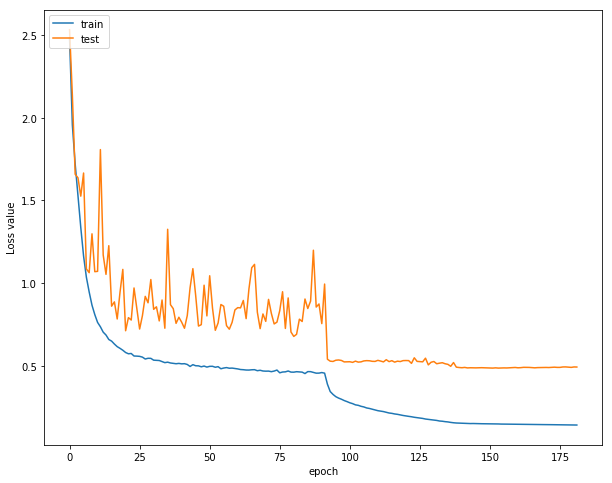

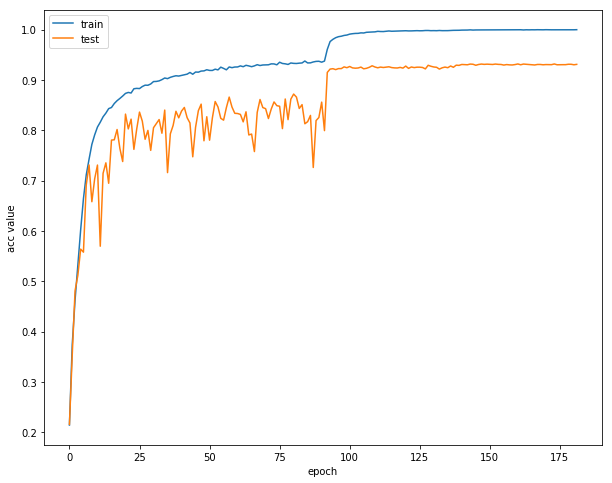

In [17]:
# plot loss and acc 
plot_history(history)

In [18]:
solver.test()

10000/10000 [==============================] - 19s 2ms/step
test data loss:0.53 acc:0.9237
